## Linear Regression

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor

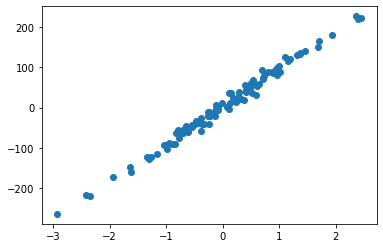

In [3]:
x, y = make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

In [13]:
learning_rate = 0.0001
nb_iter = 100
model = SGDRegressor(max_iter=nb_iter,eta0=learning_rate)
model.fit(x,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(eta0=0.0001, max_iter=100)

Coeff R2 0.2223568426935374


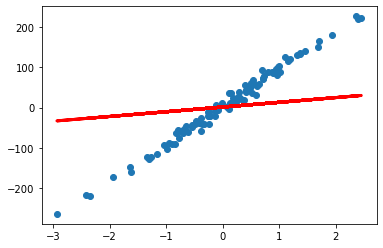

In [14]:
print("Coeff R2",model.score(x,y))
plt.scatter(x,y)
plt.plot(x,model.predict(x),c="red",lw=3)

In [25]:
learning_rate = 0.001
nb_iter = 300
model = SGDRegressor(max_iter=nb_iter,eta0=learning_rate)
model.fit(x,y)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(eta0=0.001, max_iter=300)

Coeff R2 0.9867262994822191


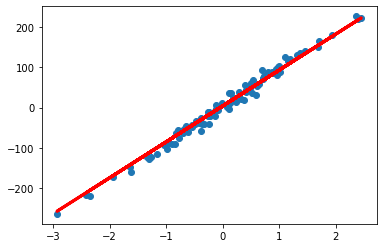

In [26]:
print("Coeff R2",model.score(x,y))
plt.scatter(x,y)
plt.plot(x,model.predict(x),c="red",lw=3)

(100, 2)

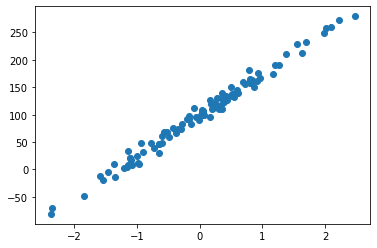

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
np.random.seed(4)
n = 1
m = 100

x, y = make_regression(n_samples=m, n_features=n, noise=10)
y = y + 100
plt.scatter(x, y)
y = y.reshape(y.shape[0], 1)

#ajouter le Bias a X
X = np.hstack((np.ones(x.shape), x))
X.shape 

In [33]:
#definir la fonction modele
def model(X, theta):
 # x shape: (m, n)
 # theta shape: (n,1)
    return X.dot(theta) #shape: (m, 1)

#definir la fonction cout
def cost_function(X, y, theta):
    m = len(y)
    J = 1/(2*m) * np.sum((model(X, theta) - y)**2)
    return J

#definit la fonction gradient
def gradient(X, y, theta):
    return 1/m * X.T.dot((X.dot(theta) - y))

In [34]:
#algorithme de Gradient Descent
def gradient_descent(X, y, theta, learning_rate =0.001, iterations = 1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))

    for i in range(0, iterations):
        prediction = model(X, theta)
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        theta_history[i,:] = theta.T

    return theta, cost_history, theta_history

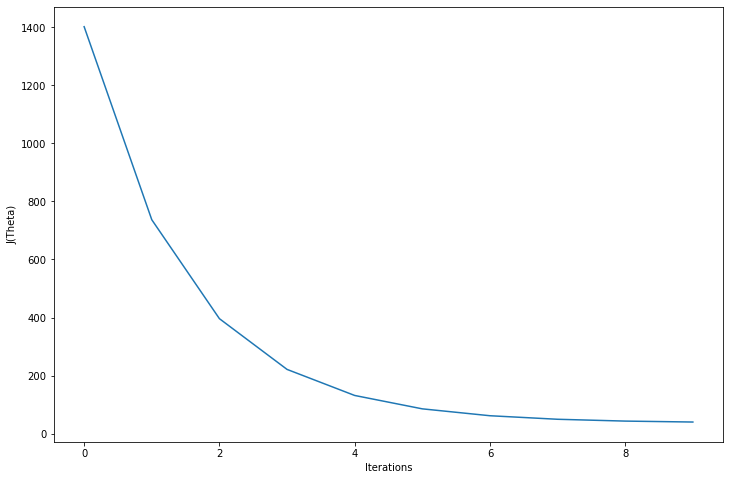

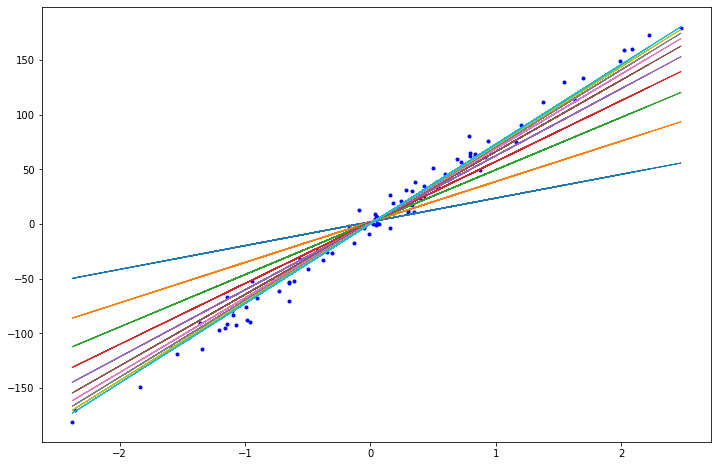

In [35]:
# utilisation de l'algorithme

np.random.seed(0)
theta = np.random.randn(2, 1)

iterations = 10
learning_rate = 0.3
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate=learning_rate, iterations = iterations)


#visualisation des courbes d'apprentissage
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iterations),cost_history)

# visualisation du modele au cours de son apprentissage
fig,ax = plt.subplots(figsize=(12,8))
_=ax.plot(x, y, 'b.')
for i in range(iterations):
    _=ax.plot(x, model(X, theta_history[i]), lw=1)

(100, 2)

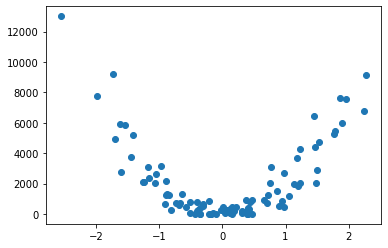

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

np.random.seed(0) 
x,y = make_regression(n_samples=m, n_features=n, noise=10)
y = y**2

# On ajoute des variables polynômiales dans notre dataset
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x = poly_features.fit_transform(x) 

plt.scatter(x[:,0], y)
x.shape # la dimension de x: 100 lignes et 2 colonnes

Coeff R2 = 0.8940616961411476


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


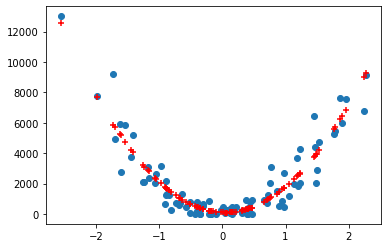

In [49]:
# On entraine le modele comme avant ! rien ne change !
model = SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(x,y)
print('Coeff R2 =', model.score(x, y))

plt.scatter(x[:,0], y, marker='o')
plt.scatter(x[:,0], model.predict(x), c='red', marker='+')